In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'serif', 'font.size': 24})
plt.rcParams.update({'font.serif':'Times New Roman'})
# %matplotlib notebook

In [43]:
loc = './MARL/results/Jul_02_05_28_28_pureCAV_localReward/eval_logs'
info = np.load(loc+'/eval_info.npy', allow_pickle=True)

In [44]:
def vsp(speed, accel):
    accel = np.array([min(5, max(-8, a)) for a in accel])
    fuel = speed*(1.1*accel + 0.132) + 0.000302*speed**3
    fuel = [max(0, f) for f in fuel]
    return fuel

####### local reward for drivers' selections

Text(0, 0.5, 'Speed (m/s)')

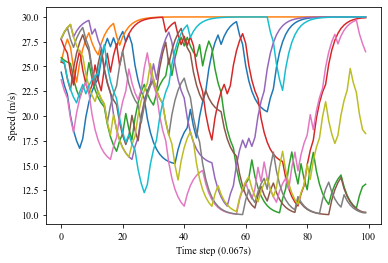

In [45]:
for i in range(info[1][0].shape[1]):
    plt.plot(info[1][0][:,i])
plt.xlabel('Time step (0.067s)')
plt.ylabel('Speed (m/s)')

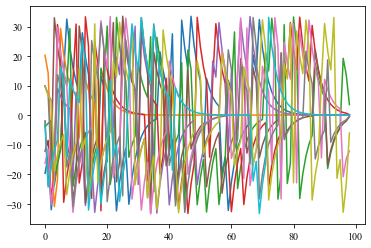

In [46]:
for i in range(info[1][0].shape[1]):
    plt.plot(np.diff(info[1][0][:,i])*15)

In [47]:
meanSpeed, meanFuel = [], []
for i in range(info[1][0].shape[1]):
    meanSpeed.append(sum(info[1][0][:,i])/len(info[1][0][:,i]))
    meanFuel.append(np.sum(vsp(info[1][0][:-1,i], np.diff(info[1][0][:,i])*15)))
print(np.mean(meanSpeed))
print(np.mean(meanFuel))

21.7313934378835
4671.357357192879


In [48]:
loc = './MARL/results/Jul_03_21_58_38_pureCAV_globalReward_unequalWeights/eval_logs'
info = np.load(loc+'/eval_info_Jul_08_01_42.npy', allow_pickle=True)

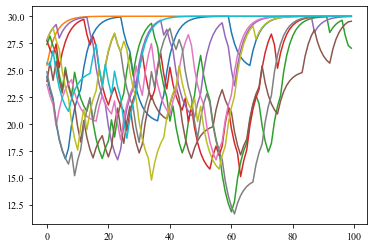

In [49]:
for i in range(info[1][0].shape[1]):
    plt.plot(info[1][0][:,i])

In [50]:
meanSpeed, meanFuel = [], []
for i in range(info[1][0].shape[1]):
    meanSpeed.append(sum(info[1][0][:,i])/len(info[1][0][:,i]))
    meanFuel.append(np.sum(vsp(info[1][0][:-1,i], np.diff(info[1][0][:,i])*15)))
print(np.mean(meanSpeed))
print(np.mean(meanFuel))

25.500543112527623
5444.62810420931


In [51]:
loc = './MARL/results/Jul_02_05_28_28_pureCAV_localReward/eval_logs'
info = np.load(loc+'/addi_info_Jul_08_04_02.npy', allow_pickle=True)

In [42]:
veh_choice = np.zeros((10, info.shape[1]))
for i in range(info.shape[1]):
    for j in range(10):
        veh_choice[j][i] = info[0][i]['decision'][j]

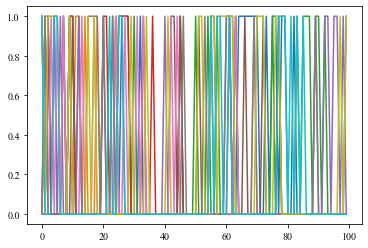

In [44]:
for i in range(10):
    plt.plot(veh_choice[i,:])

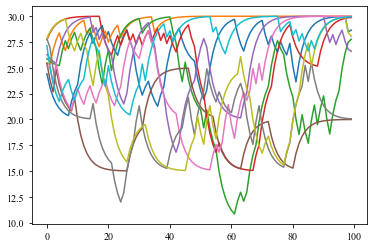

In [54]:
loc = './MARL/results/Jul_02_05_28_28_pureCAV_localReward/eval_logs'
infos = np.load(loc+'/eval_info_Jul_08_04_02.npy', allow_pickle=True)
for i in range(infos[1][0].shape[1]):
    plt.plot(infos[1][0][:,i])

In [56]:
meanSpeed, meanFuel = [], []
for i in range(infos[1][0].shape[1]):
    meanSpeed.append(sum(infos[1][0][:,i])/len(infos[1][0][:,i]))
    meanFuel.append(np.sum(vsp(infos[1][0][:-1,i], np.diff(infos[1][0][:,i])*15)))
print(np.mean(meanSpeed))
print(np.mean(meanFuel))

24.365447192393965
5675.920126640902


In [57]:
def vsp(speed, accel):
    return speed*(1.1*accel + 0.132) + 0.000302*speed**3

<IPython.core.display.Javascript object>


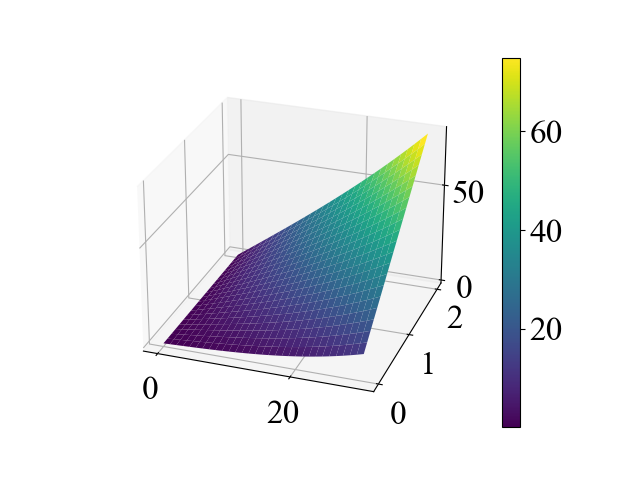

In [60]:
speeds = np.linspace(0, 30, 31)
accels = np.linspace(0, 2, 21)
x, y = np.meshgrid(speeds, accels)
z = vsp(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Add a color bar which maps values to colors.
fig.colorbar(surf)

In [65]:
vsp(30,6)

210.114